In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Single Layer
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

In [24]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

In [25]:
# softmax function
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

In [26]:
# One-hot encoding
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

In [27]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # if training data is one-hot vector
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [28]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [29]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

In [30]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [31]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

X = x_train_reshaped[:5]
print(X.shape)

(5, 784)


In [32]:
weight_init_std = 0.1
input_size = 784
hidden_size=50
output_size = 10
Y_digit = y_train[:5]

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

learning_rate = 0.1
print('계산해서 나온 더하거나 뺄 값')
print(dW2[0])
print('오차역전법 수행전')
print(W2[0])
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
print('오차역전법 수행후')
print(W2[0])

[[0.05302759 0.1071514  0.08528946 0.15218747 0.08426814 0.10632391
  0.09368683 0.08752642 0.12545703 0.10508175]
 [0.06122929 0.09974001 0.10277615 0.13601069 0.08865454 0.10638077
  0.1007823  0.07966219 0.10735989 0.11740418]
 [0.05672384 0.10662668 0.09934549 0.1293768  0.07815959 0.11056003
  0.09438824 0.08556343 0.12197062 0.11728528]
 [0.05647338 0.11228209 0.08918276 0.132365   0.09451799 0.10955982
  0.0847626  0.08620602 0.11132064 0.12332972]
 [0.06615424 0.1103055  0.0788759  0.14566091 0.08306274 0.11422019
  0.09296581 0.07269174 0.11474305 0.12131991]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.3758924869814955
계산해서 나온 더하거나 뺄 값
[ 0.00839256 -0.03716031  0.020088    0.03112954 -0.04448386 -0.03095577
  0.02050816  0.01880738  0.02654222 -0.01286792]
오차역전법 수행전
[-0.05489165 -0.06548784  0.07017373 -0.05612568  0.10048291  0.04037196
 -0.01311

In [33]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [34]:
X = x_train_reshaped[:5]
Y = y_train[:5]

for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.0567609  0.10546831 0.09997957 0.07214448 0.04768836 0.101169
  0.06210154 0.12567066 0.1851484  0.14386878]
 [0.05436217 0.08737685 0.10543411 0.0775995  0.06020507 0.09516918
  0.06737107 0.116888   0.16669751 0.16889654]
 [0.05711679 0.07919373 0.09188626 0.0705796  0.05659673 0.10013714
  0.05602304 0.11929595 0.22005212 0.14911865]
 [0.04185743 0.10695496 0.10696945 0.0645998  0.04295405 0.0906267
  0.05026564 0.12525839 0.20821207 0.16230153]
 [0.05014594 0.10473654 0.1005487  0.07612314 0.04940752 0.09143395
  0.06364402 0.12412855 0.19280637 0.14702528]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.445470399520517
---------
[[0.07533602 0.12335544 0.08729011 0.06711131 0.06068623 0.12733017
  0.05778945 0.10619488 0.13880518 0.15610122]
 [0.07578628 0.10210137 0.09131781 0.07161239 0.07694286 0.11647535
  0.06227092 0.09752697 0.1232718

In [35]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [36]:
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.14377667, 0.15180397, 0.04903027, 0.04343882, 0.10184495,
       0.19926049, 0.03731674, 0.05609072, 0.06138765, 0.15604972])

In [37]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [38]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.14377667 0.15180397 0.04903027 0.04343882 0.10184495 0.19926049
 0.03731674 0.05609072 0.06138765 0.15604972]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.06


In [39]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [19]:
iters_num = 50000  
train_size = x_train.shape[0]
batch_size = 100   
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    train_loss_list.append(Loss)
    
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.3014007583983966
train acc, test acc | 0.09863333333333334, 0.0958
Loss:  0.8314178402695898
train acc, test acc | 0.7914166666666667, 0.7967
Loss:  0.4613506400184324
train acc, test acc | 0.8776, 0.8829
Loss:  0.29218749970319274
train acc, test acc | 0.8984833333333333, 0.9001
Loss:  0.3686779832728824
train acc, test acc | 0.9084833333333333, 0.9104
Loss:  0.2646266148752191
train acc, test acc | 0.9154, 0.9172
Loss:  0.4342785574025978
train acc, test acc | 0.9193166666666667, 0.9206
Loss:  0.31829252854205003
train acc, test acc | 0.9240333333333334, 0.9252
Loss:  0.1469971529301825
train acc, test acc | 0.9272166666666667, 0.9296
Loss:  0.21221253988202154
train acc, test acc | 0.9295166666666667, 0.9292
Loss:  0.16538355977225896
train acc, test acc | 0.93315, 0.9361
Loss:  0.1668157710620008
train acc, test acc | 0.9359833333333333, 0.9374
Loss:  0.24327060090596359
train acc, test acc | 0.93875, 0.9393
Loss:  0.16394042223337968
train a

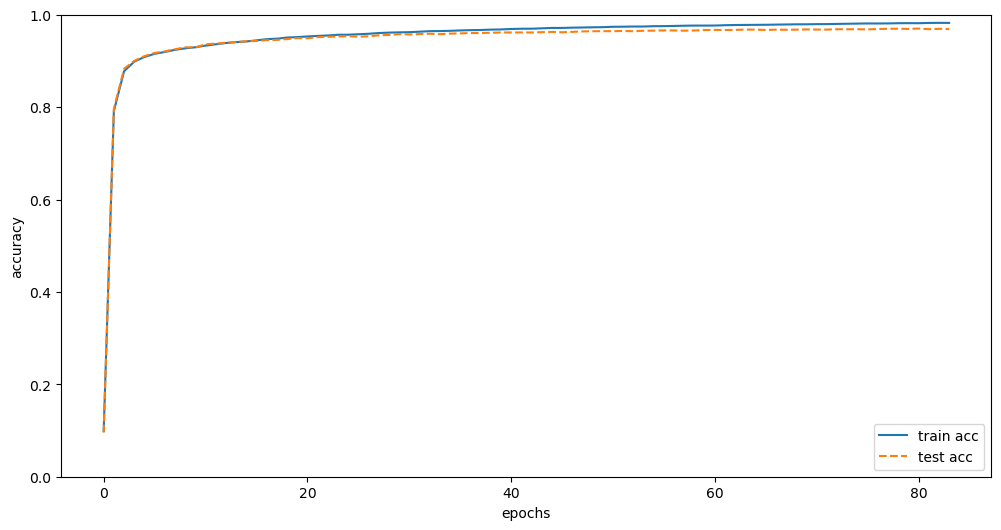

In [20]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy Graph
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

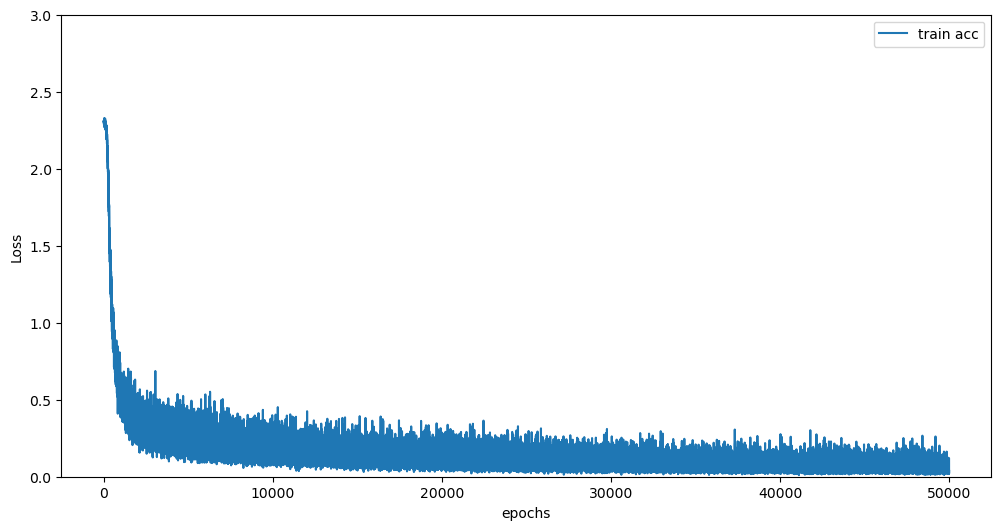

In [21]:
# Loss Graph
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()